In [2]:
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Softmax regression with two features

In [5]:
# We consider the petal length and the petal width as predictors
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [6]:
# Prepare the Softmax Regression model and train it
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [7]:
# We generate an unseen dataset with plausible features values
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

In [17]:
# Predict the probabilities 
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

In [15]:
y_proba

array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
       [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
       [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
       ...,
       [7.73770362e-23, 1.03687990e-11, 1.00000000e+00],
       [6.69680312e-23, 9.68354416e-12, 1.00000000e+00],
       [5.79592787e-23, 9.04357657e-12, 1.00000000e+00]])

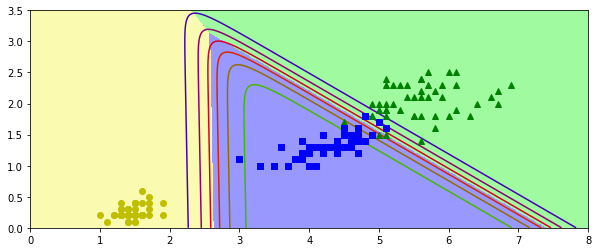

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
#plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
#plt.show()

**C (float, default=1.0)**<br>

*Inverse* of regularization strength ($\alpha$); must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])